In [7]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
dtype = torch.FloatTensor
torch.manual_seed(1)

In [15]:
time_steps = 12
input_size = 1
hidden_size = 32
output_size = 1
lr=0.02
time_series = np.linspace(0, 10, time_steps)
sinus_time_series = np.sin(time_series)
sinus_time_series = sinus_time_series.reshape(time_steps, 1)
x = torch.Tensor(sinus_time_series[:-1]).type(dtype).view(1, time_steps - 1, 1)
y = torch.Tensor(sinus_time_series[1:]).type(dtype).view(1, time_steps - 1, 1)

In [16]:
class Net(nn.Module):
    def __init__(self, ):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=1,
            batch_first=True,
        )
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden_prev):
       out, hidden_prev = self.rnn(x, hidden_prev)
       out = out.view(-1, hidden_size)
       out = torch.stack(self.linear(out), dim=1)
       return out, hidden_prev

In [17]:
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr)
hidden_prev = Variable(torch.zeros(1, 1, hidden_size))
x, y = Variable(x), Variable(y)

In [18]:
for iter in range(2000):
      output, hidden_prev = model(x, hidden_prev)
      hidden_prev = Variable(hidden_prev.data)
      loss = criterion(output, y)
      model.zero_grad()
      loss.backward()
      optimizer.step()
      if iter % 100 == 0:
        print("Iteration: {} loss {}".format(iter, loss.data[0]))

Iteration: 0 loss 0.5469983816146851
Iteration: 100 loss 0.045802030712366104
Iteration: 200 loss 0.08152885735034943
Iteration: 300 loss 0.15813066065311432
Iteration: 400 loss 0.1422843635082245
Iteration: 500 loss 0.5004843473434448
Iteration: 600 loss 0.13169783353805542
Iteration: 700 loss 0.11995396018028259
Iteration: 800 loss 0.20726917684078217
Iteration: 900 loss 0.1794283539056778
Iteration: 1000 loss 0.15386047959327698
Iteration: 1100 loss 0.08826891332864761
Iteration: 1200 loss 0.112653449177742
Iteration: 1300 loss 0.01732793264091015
Iteration: 1400 loss 0.003111728234216571
Iteration: 1500 loss 0.0019713693764060736
Iteration: 1600 loss 0.0015834476798772812
Iteration: 1700 loss 0.0013276166282594204
Iteration: 1800 loss 0.0011625736951828003
Iteration: 1900 loss 0.0010869029210880399


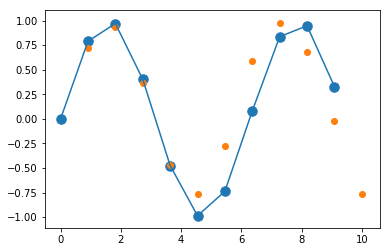

In [19]:
predictions = []
input = x[:, 0,:]
for _ in range(x.shape[1]):
  input = input.view(1, 1, 1)
  (pred, hidden_prev) = model(input, hidden_prev)
  input = pred
  hidden_prev = hidden_prev
  predictions.append(pred.data.numpy().ravel()[0])

x = x.data.numpy().ravel()
y = y.data.numpy()
pl.scatter(time_series[:-1], x.ravel(), s=90)
pl.plot(time_series[:-1], x.ravel())
pl.scatter(time_series[1:], predictions)
pl.show()
